# Introduction:

In this lab, I will work with a dataset about the quality of water based on 9 features and try to build a model to predict and detect if a water is potable or not (whether its safe to drink or not) with the information given in the dataset. My model will be a Supervised model as the dataset has a label and the label is a binary.

## About the data:

The dataset is from the kaggle website (https://www.kaggle.com/datasets/adityakadiwal/water-potability), it consists of 3276 rows and 10 columns but also includes null values that I will deal with ahead.

# About the models 

### Support Vector Machine Algorithm

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. SVMs are one of the most robust prediction methods, being based on statistical learning frameworks or VC theory proposed by Vapnik (1982, 1995) and Chervonenkis (1974)

### Logistic regression Algorithm

In statistics, the logistic model (or logit model) is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables. Logistic regression is an important machine learning algorithm. The goal is to model the probability of a random variable 
Y being 0 or 1 given experimental data.

### Ridge classification Algorithm

In machine learning, ridge classification is a technique used to analyze linear discriminant models. It is a form of regularization that penalizes model coefficients to prevent overfitting. Ridge classification works by adding a penalty term to the cost function that discourages complexity. The penalty term is typically the sum of the squared coefficients of the features in the model.

### Stochastic Gradient Descent Algorithm

The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification.

# Importing the libraries

The first thing that we need to do is to import all the libraries necessary for our work in this lab.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import minmax_scale
import itertools
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, jaccard_score

# Calling the data

The data is stored in my system locally so I will just call the data from my hard drive.

In [2]:
df=pd.read_csv("E:/Reza/New folder/Python/Datasets/water_potability.CSV")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Cleaning

Before building our model, we need to look into our data carefully to see if there are any modifications that we can do to help build a better model. These modifications could be data cleaning, feature selection, feature extraction, data normalization and.... Here, there is an issue with the data in that it is filled with non numeric data which cannot be processed by the model. What I will now do is to turn these non-numeric data to numeric data:

In [3]:
#First I check to see whether there are any missing data in our dataset
df.isnull().sum()
#We see that 'ph', 'Sulfate' and 'Trihalomethanes' features all have missing value

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df.isnull().mean()
#I will use this code to see what percentage of the data is missing for the three columns mentioned above
#we can see that for 'ph' and 'Trihalomethanes' its at 14% and 4% respectively that are not big number and so with some data preprocessing techniques we can fix it
#However for 'Sulfate' the percentage of missing data is 23% and that is big part of the data

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

# KNNImputer

For dealing with the missing values, rather than deleting them or filling the missing values with the mean or mode of that column, I have used the k-Nearest Neighbors algorithm. With the help of this algorithm, "each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set." (https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

In [5]:
#First I will drop the label column, 'Potability', as it has no missing value
x=df.drop(['Potability'], axis=1)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(x)
df_imputer= imputer.transform(x)
x=pd.DataFrame(df_imputer , index=x.index, columns=x.columns)
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [6]:
#Now we can see that our data no longer has any missing value
x.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

# Data Analysis & Data Visualization

Before building the model I will look further into the data to build a good intuition regarding the data. I will also use data visualization tools to help us in building our intuition.

In [7]:
#First I would like to see that what percentage of the output is potable and what percentage is not potable
df['Potability'].value_counts(normalize=True)
#We can see that almost 61 % is potable while 31% is not potable

0    0.60989
1    0.39011
Name: Potability, dtype: float64

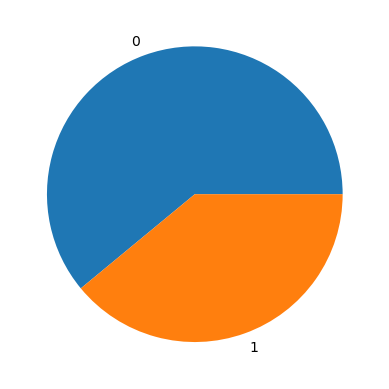

In [8]:
#we can see this also with a pie chart:
dc= df.value_counts('Potability')
plt.pie(dc.values, labels=dc.index);

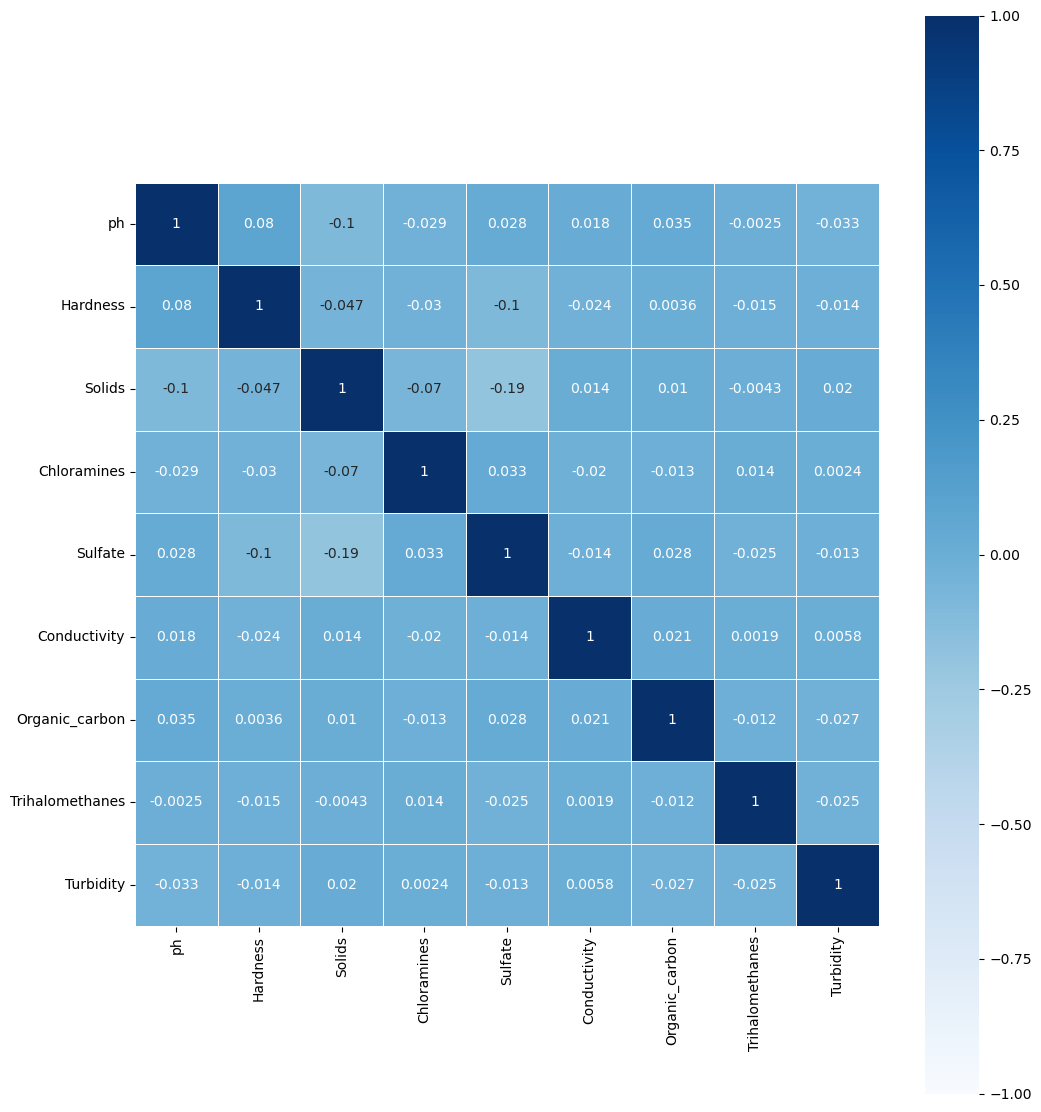

In [9]:
#I want to see the corelation between the elements in the water:
fig, ax = plt.subplots(figsize=(12, 14))
heatmap = sb.heatmap(x.corr(), square = True, linewidths = .7, cmap = 'Blues',  vmin = -1,vmax = 1,annot = True)

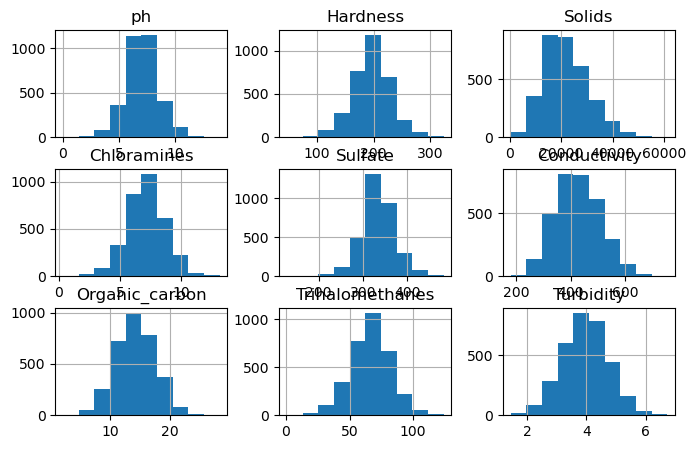

In [10]:
#I also want to check and see if the data has any glaring skewness
x.hist(figsize=(8,5))
plt.show()

In [11]:
x.describe()
#This code is very useful and will give an overview of the data and where the most data points for each feature is

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.078105,196.369496,22014.092526,7.122277,333.606885,426.205111,14.284970,66.404535,3.966786
std,1.497176,32.879761,8768.570828,1.583085,37.458153,80.824064,3.308162,15.837376,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.187017,176.850538,15666.690297,6.127421,312.377537,365.734414,12.065801,56.409254,3.439711
50%,7.052221,196.967627,20927.833607,7.130299,333.268376,421.884968,14.218338,66.610937,3.955028
75%,7.948570,216.667456,27332.762127,8.114887,355.013586,481.792304,16.557652,76.843337,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


# Data Normalization

One more step before building the model is needed and that is data normalization. Data normalization is the practice of organizing data entries to ensure they appear similar across all fields and records. It usually helps one to build a better model as the computations will be done more smoothly.

## MinMaxScaler

MinMaxScaler is a popular data normalization that scales the data to a fixed range, typically between 0 and 1.

In [12]:
scale_x=minmax_scale(x, feature_range=(0,1))
#After scaling the data, the data will be a combination of raw numbers in ndarray numpy format and no longer in the pandas data frame which we need
#So now I will bring those numbers after normalization and put them in our original data frame using the pandas library: 
x=pd.DataFrame(scale_x , index=x.index, columns=x.columns)
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.511204,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.588285,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.572249,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327


# Model

Now, I will build the model. First I will split the data into four parts: X_train(features of the data given to the model to train on and learn from), y_train(given label for the corresponding features in X_train for the computer to train on and learn from), X_test(given features to the computer so the computer would give the labels based on the model and algorithm that it trained on), y_test(the hold-out labels corresponding to the features in the X_test (the real labels for hose records) this is used to test the models accuracy)

In [13]:
#The 'Potability' feature is our label so I drop it from our x section which is only the input features
#And our y, which is only the label will be the 'Potability'
y=df.Potability

#I split the data into the 4 parts mentioned above and use the test size 0.3, meaning that 70% of the data will be trained on and 30% will be used to test our model
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=42)
#Finally I will use .shape to see shape and size of each part of our data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2293, 9), (983, 9), (2293,), (983,))

#### class_weight

Above, we saw that within our data the amount of potable water is 61% while the not potable water is only 31%. This can creat problems for our model as there are much more potable water than not potable water so our model could be biased. In order to stop the bias in our model, I will use the class_weight code that will give more weight to one class compared to other based on the numbers one chooses.

In [14]:
log=LogisticRegression(max_iter=1000, class_weight={0:0.4,1:0.6})
log.fit(X_train, y_train)
logpred = log.predict(X_test)

In [15]:
ridg=RidgeClassifier(class_weight={0:0.4,1:0.6})
ridg.fit(X_train, y_train)
ridgpred = ridg.predict(X_test)

In [16]:
sgd=SGDClassifier(max_iter=1000, tol=1e-3, class_weight={0:0.4,1:0.6})
sgd.fit(X_train, y_train)
sgdpred = sgd.predict(X_test)

In [17]:
from sklearn import svm
svm = svm.SVC(kernel='linear', class_weight={0:0.4,1:0.6})
svm.fit(X_train, y_train)
svmpred = svm.predict(X_test)

# Model Evaluation

Here I will test the performance of our model and see how well it has done based on metrics such as accuracy, recall score and...

In [18]:
#Accuracy score checks the accuracy of our model

#Recall score is also known as sensitivity or the true positive rate, The higher the recall score, the better the machine learning model is at identifying both positive and negative examples.

#precision score measures the proportion of positively predicted labels that are actually correct. Precision is also known as the positive predictive value

#F1 score represents the model score as a function of precision and recall score.
#F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall

#Below, I will use the classification_report code to show all the models performances based on the metrics explained above

In [19]:
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       617
           1       0.38      0.45      0.42       366

    accuracy                           0.52       983
   macro avg       0.51      0.51      0.51       983
weighted avg       0.54      0.52      0.53       983



In [39]:
print(classification_report(y_test,ridgpred))

              precision    recall  f1-score   support

           0       0.64      0.56      0.59       617
           1       0.38      0.46      0.42       366

    accuracy                           0.52       983
   macro avg       0.51      0.51      0.51       983
weighted avg       0.54      0.52      0.53       983



In [20]:
print(classification_report(y_test,sgdpred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       1.00      0.01      0.02       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



In [21]:
print(classification_report(y_test,svmpred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       617
           1       0.43      0.34      0.38       366

    accuracy                           0.58       983
   macro avg       0.54      0.54      0.53       983
weighted avg       0.57      0.58      0.57       983



# Conclusion

In this lab I tried to build a logistic regression model, a support vector machine, a ridge classification model and a stochastic gradient descent model to predict the quality of the water and whether its potable or not with the given dataset. I also used the k-Nearest Neighbors algorithm imputer to deal with the missing data and used the MinMaxScaler to scale and normalized the data. Furthermore, I analyzed the data and used data visualization to get a better intuition of our data. Finally I evaluated each model with standard well-known classifiction model metrics such as f1 score and accuracy score.

# Refrences

Note that I have used codes and peices of information from other sources in this lab such as IBM, Andrew NG, Coursera platform, Wikipedia website, the https://scikit-learn.org/stable/index.html website and the https://vitalflux.com/ website.